In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X= iris.data[: , [2,3]]
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=1 , stratify = y)

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

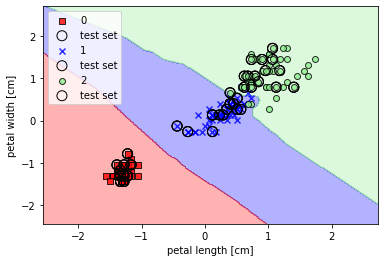

In [3]:
from funzioni_utili import plot_dec_reg
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')

knn.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
plot_dec_reg(X_combined, y_combined,
                        classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()


In [4]:
y_pred = knn.predict(X_test_std)
print('Errori: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza %.2f' % accuracy_score(y_test , y_pred))

Errori: 0
Accuratezza 1.00


In [5]:
knn.score(X_train_std , y_train)

0.9619047619047619

Vorrei provare a fare un test su vari k e vedere che succede facendo un for

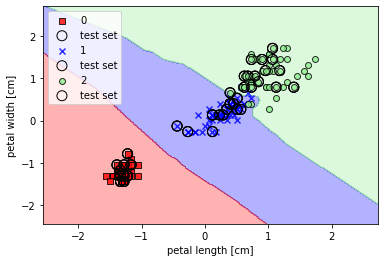

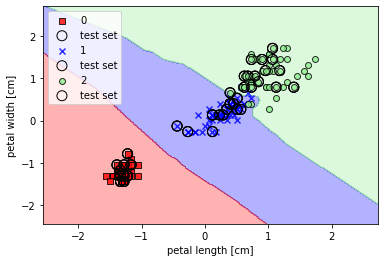

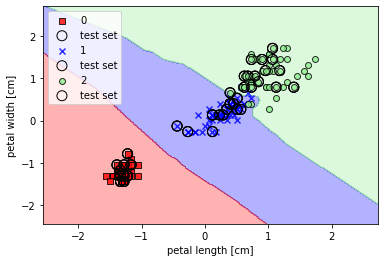

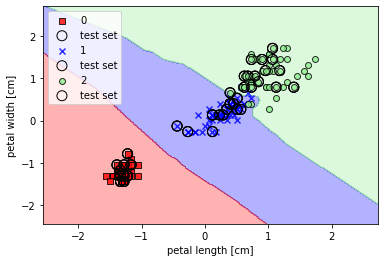

In [10]:
for i in range (1,5):
    knn1 = KNeighborsClassifier(n_neighbors=i, p=2,metric='minkowski')
    knn1.fit(X_train_std, y_train)
    X_combined = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_dec_reg(X_combined, y_combined,
                        classifier=knn, test_idx=range(105, 150))
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()

Povo a fare un knn per lo xor

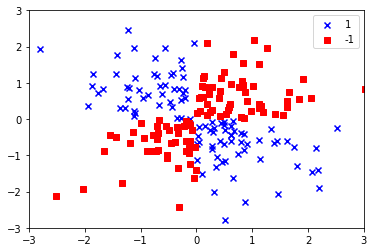

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1,
											1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor ==
											-1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

In [8]:
X_train_xor, X_test_xor , y_train_xor , y_test_xor = train_test_split(X , y , test_size = 0.3 , 
    random_state=1 , stratify = y)
sc.fit(X_train_xor)
X_train_xor_std = sc.transform(X_train_xor)
X_test_xor_std = sc.transform(X_test_xor)
knn.fit(X_train_xor_std , y_xor)

ValueError: Found input variables with inconsistent numbers of samples: [105, 200]